### 신경망 모델 훈련


In [1]:
from tensorflow import keras
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [2]:
(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()
train_scaled = train_input/ 255.0
train_scaled , val_scaled , train_target, val_target = train_test_split(train_scaled, train_target, test_size=0.2, random_state=42)

In [3]:
def model_fn(a_layer=None):
    model = keras.Sequential()
    model.add(keras.layers.Flatten(input_shape=(28,28)))
    model.add(keras.layers.Dense(100,activation='relu'))
    if a_layer :
        model.add(a_layer)
    model.add(keras.layers.Dense(10,activation='softmax'))
    return model
            

In [4]:
model = model_fn()
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 100)               78500     
                                                                 
 dense_1 (Dense)             (None, 10)                1010      
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


In [5]:
b = keras.layers.Dense(10 ,activation='sigmoid')
model1 = model_fn(b)

In [6]:
model1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_3 (Dense)             (None, 100)               78500     
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
 dense_4 (Dense)             (None, 10)                110       
                                                                 
Total params: 79,620
Trainable params: 79,620
Non-trainable params: 0
_________________________________________________________________


In [7]:
model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy')
history = model.fit(train_scaled, train_target,epochs=5, verbose=0)

In [8]:
print(history.history.keys())
print(history.history['accuracy'])
print(history.history['loss'])


dict_keys(['loss', 'accuracy'])
[0.8128541707992554, 0.8588958382606506, 0.8738958239555359, 0.8798750042915344, 0.8845833539962769]
[0.5305590629577637, 0.3925510346889496, 0.35381555557250977, 0.3348395824432373, 0.319155752658844]


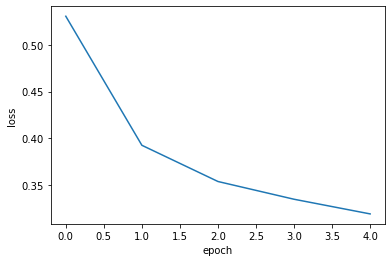

In [9]:
plt.plot(history.history['loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

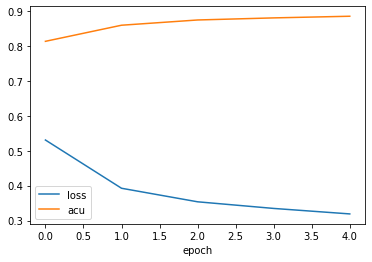

In [10]:
plt.plot(history.history['loss'])
plt.plot(history.history['accuracy'])
plt.xlabel('epoch')
plt.legend(['loss','acu'])
plt.show()

In [11]:
model = model_fn()
model.compile(loss='sparse_categorical_crossentropy',metrics='accuracy')
history=model.fit(train_scaled,train_target,epochs=20,verbose=0,
                  validation_data=(val_scaled,val_target))

In [12]:
print(history.history.keys())
print(history.history['val_accuracy'])

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])
[0.8465833067893982, 0.8745833039283752, 0.8769166469573975, 0.8744166493415833, 0.8763333559036255, 0.8799166679382324, 0.878083348274231, 0.8785833120346069, 0.8736666440963745, 0.8803333044052124, 0.8768333196640015, 0.8776666522026062, 0.875, 0.8824166655540466, 0.8830000162124634, 0.8859999775886536, 0.8769166469573975, 0.8827499747276306, 0.878250002861023, 0.8794166445732117]


- 검증 손실
   - 에포크에 따른 과대적합과 과소적합을 파악하려면 훈련 세트에 대한 점수뿐 만 아니라 검증세트에 대한 점수도 봐야함

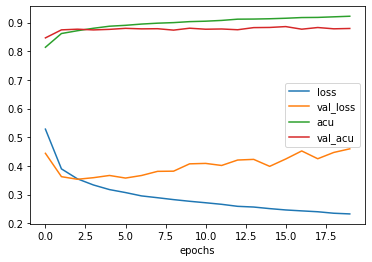

In [13]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.xlabel('epochs')
plt.legend(['loss','val_loss','acu','val_acu'])
plt.show()

In [14]:
(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()
train_scaled = train_input/ 255.0
train_scaled , val_scaled , train_target, val_target = train_test_split(train_scaled, train_target, test_size=0.2, random_state=42)

- 과대적합을 막는 신경망에 특화된 규제 방법
   1. 옵티마이저 하이퍼 파라미터를 조정하여 과대적합 완화
       - 기본 RMSprop 옵티마이저는 많은 문제에서 잘 동작
       - 이 옵티마이저 대신 다른 옵티마이저를 테스트해 본다면 Adam이 가장 좋은 선택
       - Adam은 적응적 학습률을 사용하기 때문에 에포크가 진행되면서 학습률의 크기를 조정

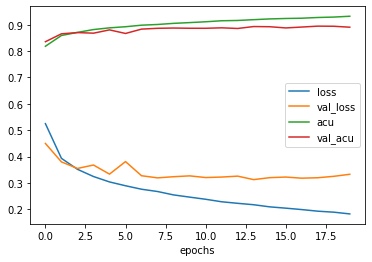

In [15]:
model = model_fn()
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics='accuracy')
history = model.fit(train_scaled,train_target, epochs=20,verbose=0, validation_data=(val_scaled,val_target))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.xlabel('epochs')
plt.legend(['loss','val_loss','acu','val_acu'])
plt.show()

#### 드롭아웃(dropout) 딥러닝의 아버지라 불리는 제프리 힌턴이 소개
   - 훈련과정에서 층에 있는 일부 뉴런을 랜덤하게 꺼서 과대적합을 막음
      1. 이전 층의 일부 뉴런이 랜덤하게 꺼지면 특정 뉴런에 과대하게 의존하는 것을 줄일 수 있고 모든 입력에 대해 주의를 기울여야 함
      2. 드롭아웃을 적용해 훈련하는 것이 2개의 신경망을 앙상블 하는 것처럼 상상할 수 있음
   - 케라스에서는 드롭아웃은  keras.layer 패키지 아래 Dropout 클래스로 제공함
   - 어떤 층의 뒤에 드롭아웃을 두어 층의 출력을 랜덤하게 0으로 만들고, 층으로 사용되지만 훈련
   - model_fn() 함수에 드롭아웃 객체를 전달하여 층을 추가하고, 30% 정도를 드롭아웃 함

- 콜백 (call back) : 케라스에서 훈련 과정 중간에 어떤 작업을 수행할 수 있게 하는 객체로 keras, callbacks 패키지 아래에 있는 클래스로 fit()에 메서드의 callback 매개변수에 리스트로 전달하여 사용
- 적응률 학습률 (adaptive learning rate) : 모델이 최적점에 가까이 갈수록 안정적으로 수렴하도록 학습률을 낮추도록  조정하는 방법. 이런 방식들은 학습률 매개변수를 튜닝하는 수고를 덜 수 있는 것이 장점.
- 조기 종료

In [16]:
(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()
train_scaled = train_input/ 255.0
train_scaled , val_scaled , train_target, val_target = train_test_split(train_scaled, train_target, test_size=0.2, random_state=42)

In [17]:
model = model_fn(keras.layers.Dropout(0.3))
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_4 (Flatten)         (None, 784)               0         
                                                                 
 dense_9 (Dense)             (None, 100)               78500     
                                                                 
 dropout (Dropout)           (None, 100)               0         
                                                                 
 dense_10 (Dense)            (None, 10)                1010      
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


##### 모델 저장

In [19]:
model = model_fn(keras.layers.Dropout(0.3))
model.compile(optimizer='adam', loss ='sparse_categorical_crossentropy', metrics='accuracy')
history = model.fit(train_scaled, train_target, epochs=10, validation_data=(val_scaled,val_target), verbose = 0)

model.save_weights('model-weight.h5')
#케라스 모델은 훈련된 모델의 파라미터를 저장하는 간편한 save_weights() 메서드를 제공함.
#기본적으로 이 메서드는 텐서ㅡㄹ로의 체크포인트 포맷으로 저장함.
#그러나 파일의 확장자가 'h5'일 경우 HDF5 포멧으로 저장

model.save('model-whole.h5')
#모델 구조와 모델 파라미터를 함께 저장하는 save()메서드도 제공

In [21]:
model = keras.models.load_model('model-whole.h5')
model.evaluate(val_scaled,val_target)

375/375 [==============================] - 1s 2ms/step - loss: 0.3256 - accuracy: 0.8824


[0.3256111145019531, 0.8824166655540466]

- 실험 1. 훈련을 하지 않은 새로운 모델을 만들고 model-whole.h5파일에서 훈련된 모델 파라미터를 읽어서 사용
- 실험 2. model-whole.h5파일에서 새로운 모델을 만들어 바로 사용

In [22]:
# 실험 1 : 훈련하지 않은 모델을 만들고 이전에 저장했던 모델 파리미터를 적재
# 이때 사용하는 메서드는 save_ weighs() 와 쌍을 이루는 load_weights() 메서드다
model = model_fn(keras.layers.Dropout(0.3))
model.load_weights('model-whole.h5')

import numpy as np
val_labels = np.argmax(model.predict(val_scaled), axis=-1)
# predict() 메서드 결과에서 가장 큰 값을 고르기 위해 넘파이 argmax() 함수를 사용함
# argmax()함수의 axis= -1 은 배열의 마지막 차원을 따라 최댓값을 고름
# axis = 1 열을 따라 각행의 최댓값의 인덱스를 선택
# axis = 0 이면 행을 따라 각열의 최댓값의 인덱스
print(np.mean(val_labels == val_target))

375/375 [==============================] - 2s 3ms/step
0.8824166666666666


#### 콜백(callback) 
-  훈련 과정 중간에 어떤 작업을 수행할 수 있게 하는 객체 keras.callbacks 패키지 아래에 있는 클래스들
- 콜백은 기본적으로 최상의 검증 점수를 모델을 만드는 모델을 저장 

In [23]:
# 모델을 두번 훈련하지 않고 한번에 끝낼 수 있는 방법
# ModelCheckpoint 콜백은 기본적으로 최상의 검증 점수를 만드는 모델을 저장
model = model_fn(keras.layers.Dropout(0.3))
model.compile(optimizer='adam', loss ='sparse_categorical_crossentropy', metrics='accuracy')
cheackpoint_cb = keras.callbacks.ModelCheckpoint('best-model.h5')
model.fit(train_scaled,train_target, epochs=20, verbose=0, validation_data=(val_scaled,val_target),callbacks=[cheackpoint_cb])